<a href="https://colab.research.google.com/github/taufiqwahid/Training-SKLearn-K-means/blob/master/Training_SKLearn_K_means_method_Elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Latihan SKLearn K-means method Elbow

import pandas as pd #mengimpor pandas untuk memanipulasi data
import matplotlib.pyplot as plt #menggunakan matplotlib untuk visualisasi data
%matplotlib inline 
import seaborn as sns #digunakan untuk visualisasi agar tampak menarik untuk menampilkan label ataupun atribut yg diinginkan

#ubah file csv menjadi dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DATANYA/Latihan SKLearn K-means/Mall_Customers.csv')

# tammpilkan 3 baris pertama
df.head(3)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [2]:
# ubah namma kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age','Annual Income (k$)': 'annual_income','Spending Score (1-100)': 'spending_score'}) #rename kolom 

# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)


,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [3]:
from sklearn.cluster import KMeans
#menghilangkan kolom cutomor id dan gender

X = df.drop(['CustomerID','gender'],axis=1) #menghilangkan kolom CustomerID dan Gender jika ada

#membuat list yang berisi inersia
clusters = []   #inisialisasi list
for i in range(1,11):    #menggunakan perulangan dimulai dari nilai 1 sampai 11
  km = KMeans(n_clusters=i).fit(X)  #mengisi cluster sesuai perulangan pada library KMeans pada data X yg telah dihilangkan kolom apa saja yg tidak digunakan 
  clusters.append(km.inertia_) #menambahkan intertia 
  print(km.inertia_)  #menampilkan hasilnya
  

308812.78
212840.16982097185
143342.751571706
104366.15145556198
75350.77917248776
58300.44332159069
51098.58740856844
44307.87341670445
40916.393036274065
37214.0151639612


Text(0, 0.5, 'Inertia')

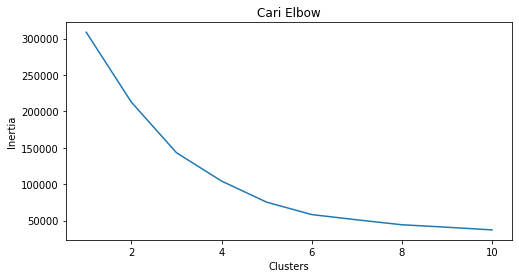

In [4]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4)) #membuat tmpilan 8x4
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax) #membuat garis menyesuaikan dengan data clustersnya

ax.set_title('Cari Elbow') #judul plot
ax.set_xlabel('Clusters') #label horizontal
ax.set_ylabel('Inertia')  #label vertical


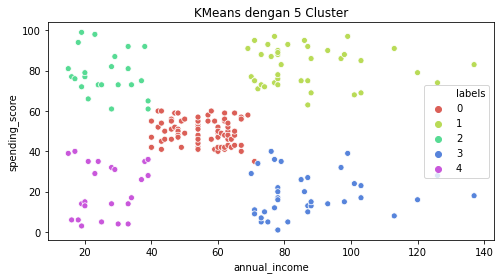

In [5]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X) #mengisi clusters sebanyak 5

#Menambahkan kolom label pada dataset
X['labels'] = km5.labels_

#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'],X['spending_score'],hue=X['labels'],palette=sns.color_palette('hls',5)) #membuat tampilan plot dengan titik titik
plt.title('KMeans dengan 5 Cluster') #jduul plot
plt.show() #menampilkan plot